In [1]:
# Installing required libraries
!pip install numpy==1.26.0
!pip install pandas
!pip install statsmodels
!pip install tensorflow
!pip install keras
!pip install scipy
!pip install matplotlib

In [2]:
conda install numpy=1.26.0 pandas statsmodels tensorflow keras scipy matplotlib

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
DEBUG:urllib3.connectionpool:Start

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import tensorflow as tf
import keras
import scipy
import matplotlib

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Statsmodels version: {statsmodels.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

/Users/omsapkar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NumPy version: 1.26.0
Pandas version: 2.2.3
Statsmodels version: 0.14.0
TensorFlow version: 2.18.0
Keras version: 3.8.0
SciPy version: 1.10.1
Matplotlib version: 3.7.1


ADF Statistic: -4.095329257800915
p-value: 0.000985885823657394


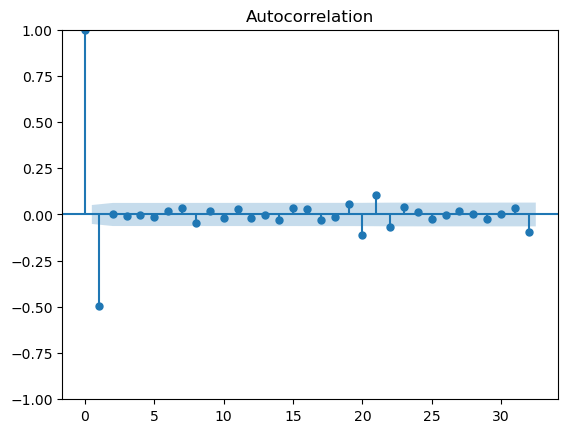

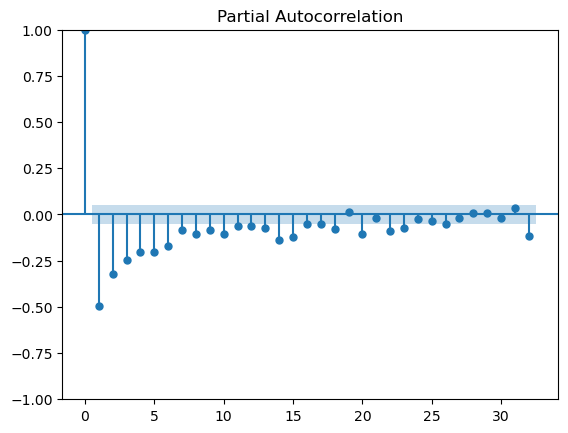

/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_39273/2832404862.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=prophet_data['ds'].iloc[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')


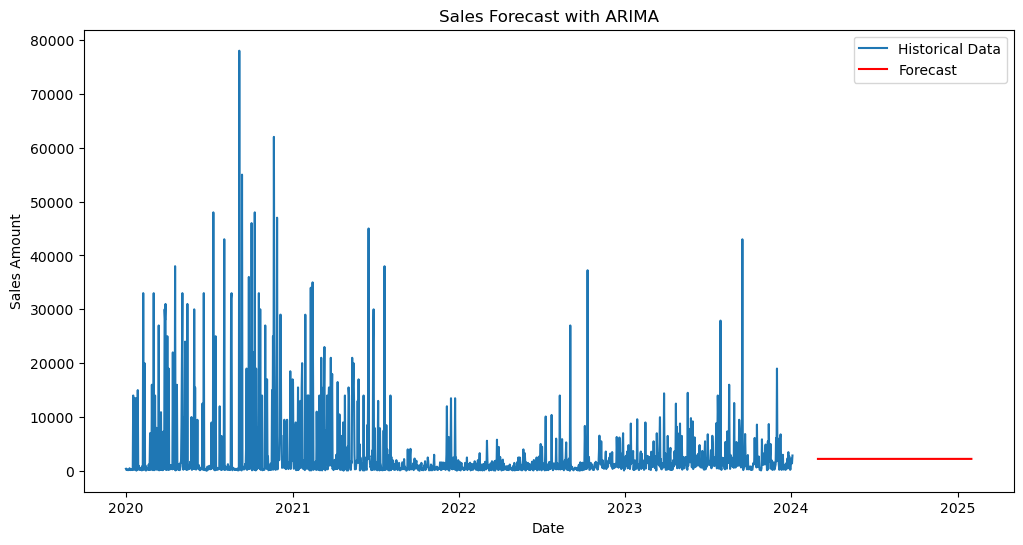

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Perform the ADF test for stationarity
result = adfuller(prophet_data['y'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the data is non-stationary, difference it
data_diff = prophet_data['y'].diff().dropna()

# Plot ACF and PACF
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

# Fit the ARIMA model (adjust p, d, q based on the ACF/PACF plots)
model = ARIMA(prophet_data['y'], order=(1, 1, 1))  # Example: p=1, d=1, q=1
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data')
plt.plot(pd.date_range(start=prophet_data['ds'].iloc[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

ds    0
y     0
dtype: int64


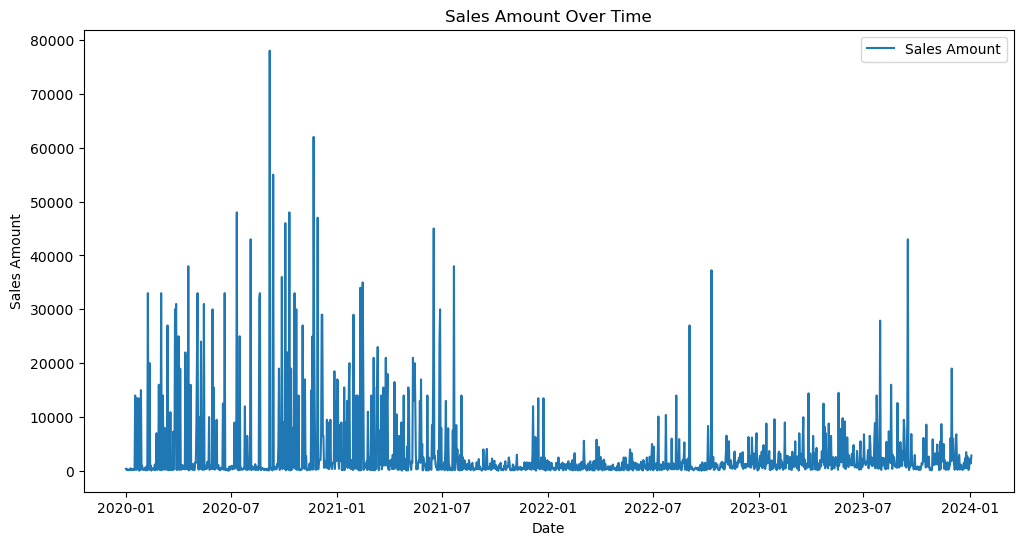

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Load the dataset
data = pd.read_csv('/Users/omsapkar/Downloads/amazon_Cleaned.csv')  # Update the path to your file if needed
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' column is in datetime format

# Remove duplicates based on the 'Date' column
data = data.drop_duplicates(subset=['Date'])

# Prepare the data for LSTM (rename columns for Prophet compatibility)
prophet_data = data[['Date', 'discounted_price']]
prophet_data.columns = ['ds', 'y']  # Prophet expects 'ds' for dates and 'y' for values

# Check for missing values
print(prophet_data.isnull().sum())

# Visualize the data to check for trends
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Sales Amount')
plt.title('Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_39634/3815445760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data['lag_1'] = prophet_data['y'].shift(1)  # Previous day's sales
/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_39634/3815445760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data['lag_2'] = prophet_data['y'].shift(2)  # 2-day lag
/var/folders/x8/6n97vt752tbd1myzll984sq80000gn/T/ipykernel_39634/3815445760.py:4: SettingWithCopyWarning: 
A value is

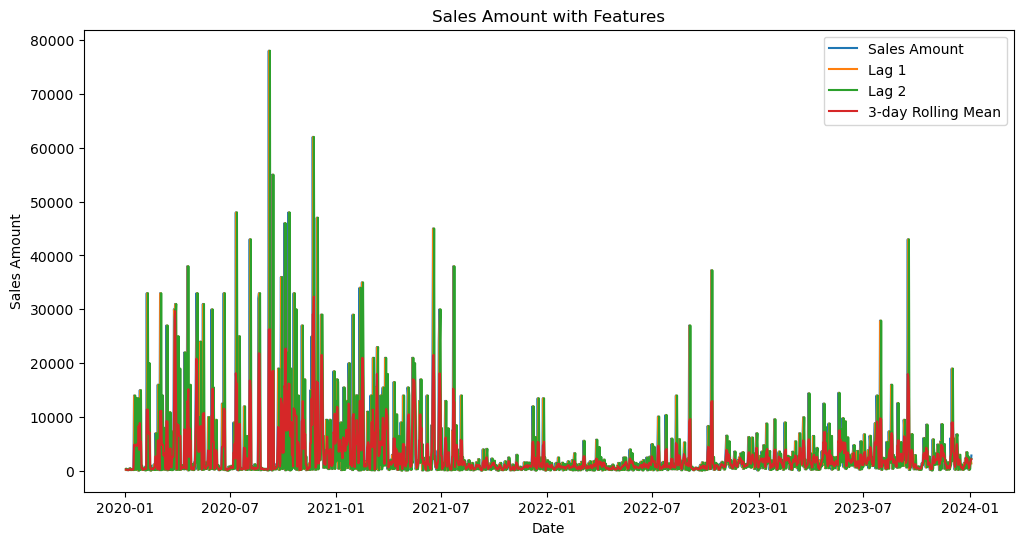

In [7]:
# Add lag features (previous day's sales and 3-day rolling mean)
prophet_data['lag_1'] = prophet_data['y'].shift(1)  # Previous day's sales
prophet_data['lag_2'] = prophet_data['y'].shift(2)  # 2-day lag
prophet_data['rolling_mean'] = prophet_data['y'].rolling(window=3).mean()  # 3-day rolling mean

# Drop rows with missing values (due to lag)
prophet_data = prophet_data.dropna()

# Visualize the data with added features
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Sales Amount')
plt.plot(prophet_data['ds'], prophet_data['lag_1'], label='Lag 1')
plt.plot(prophet_data['ds'], prophet_data['lag_2'], label='Lag 2')
plt.plot(prophet_data['ds'], prophet_data['rolling_mean'], label='3-day Rolling Mean')
plt.title('Sales Amount with Features')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

Epoch 1/20


/Users/omsapkar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79680872.0000
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65973684.0000 
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63813272.0000 
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61458084.0000 
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58897528.0000 
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56553824.0000
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68210336.0000 
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71118240.0000 
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49126892.0000
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75553024.0000
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68323936.0000
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59266200.0000 
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56739392.0000 
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5270

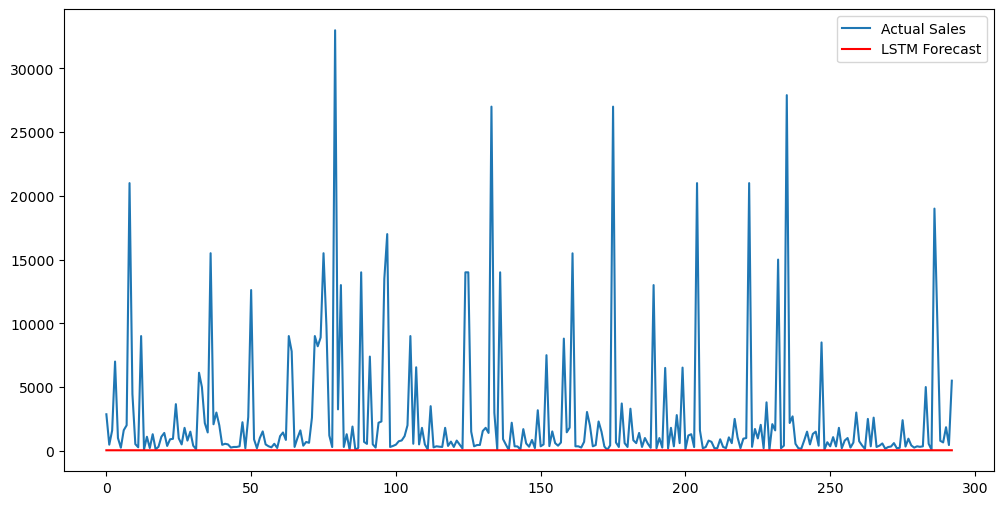

In [8]:
# Define a function to create sequences of data for LSTM
def create_lstm_data(df, time_step=1):
    X, y = [], []
    for i in range(time_step, len(df)):
        X.append(df.iloc[i-time_step:i, 1].values)
        y.append(df.iloc[i, 1])
    return np.array(X), np.array(y)

# Reshape the data for LSTM
X, y = create_lstm_data(prophet_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout rate of 20%
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Forecasting the next value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales')
plt.plot(predictions, label='LSTM Forecast', color='red')
plt.legend()
plt.show()